<IPython.core.display.Javascript object>


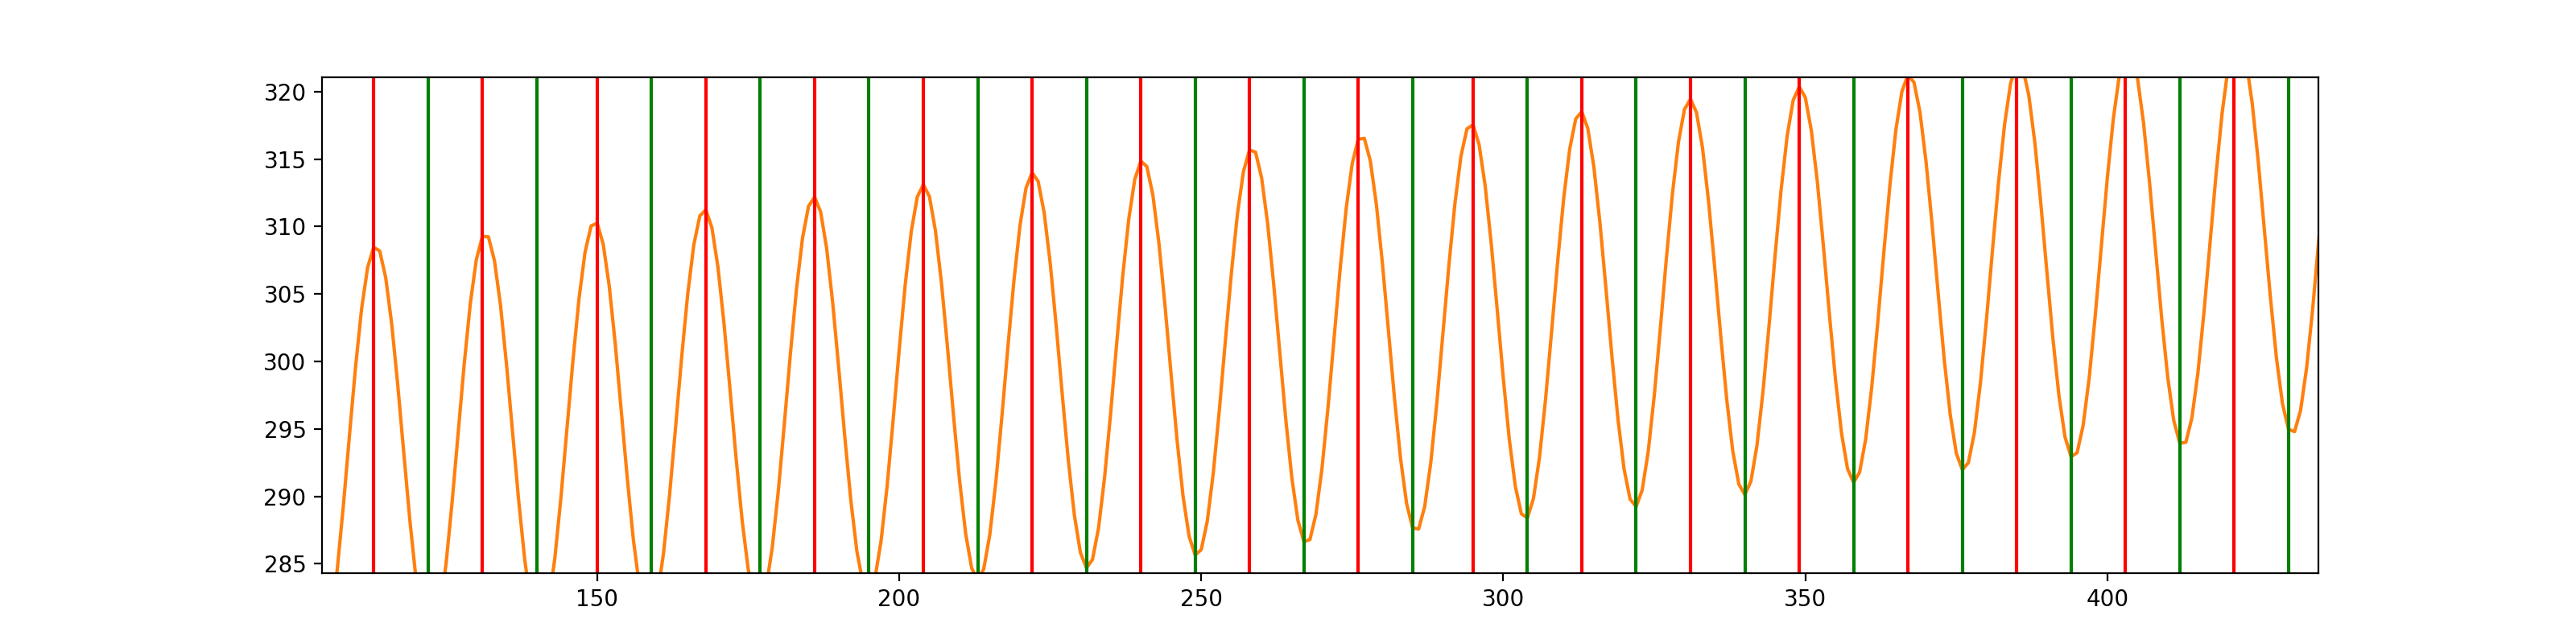

<IPython.core.display.Javascript object>


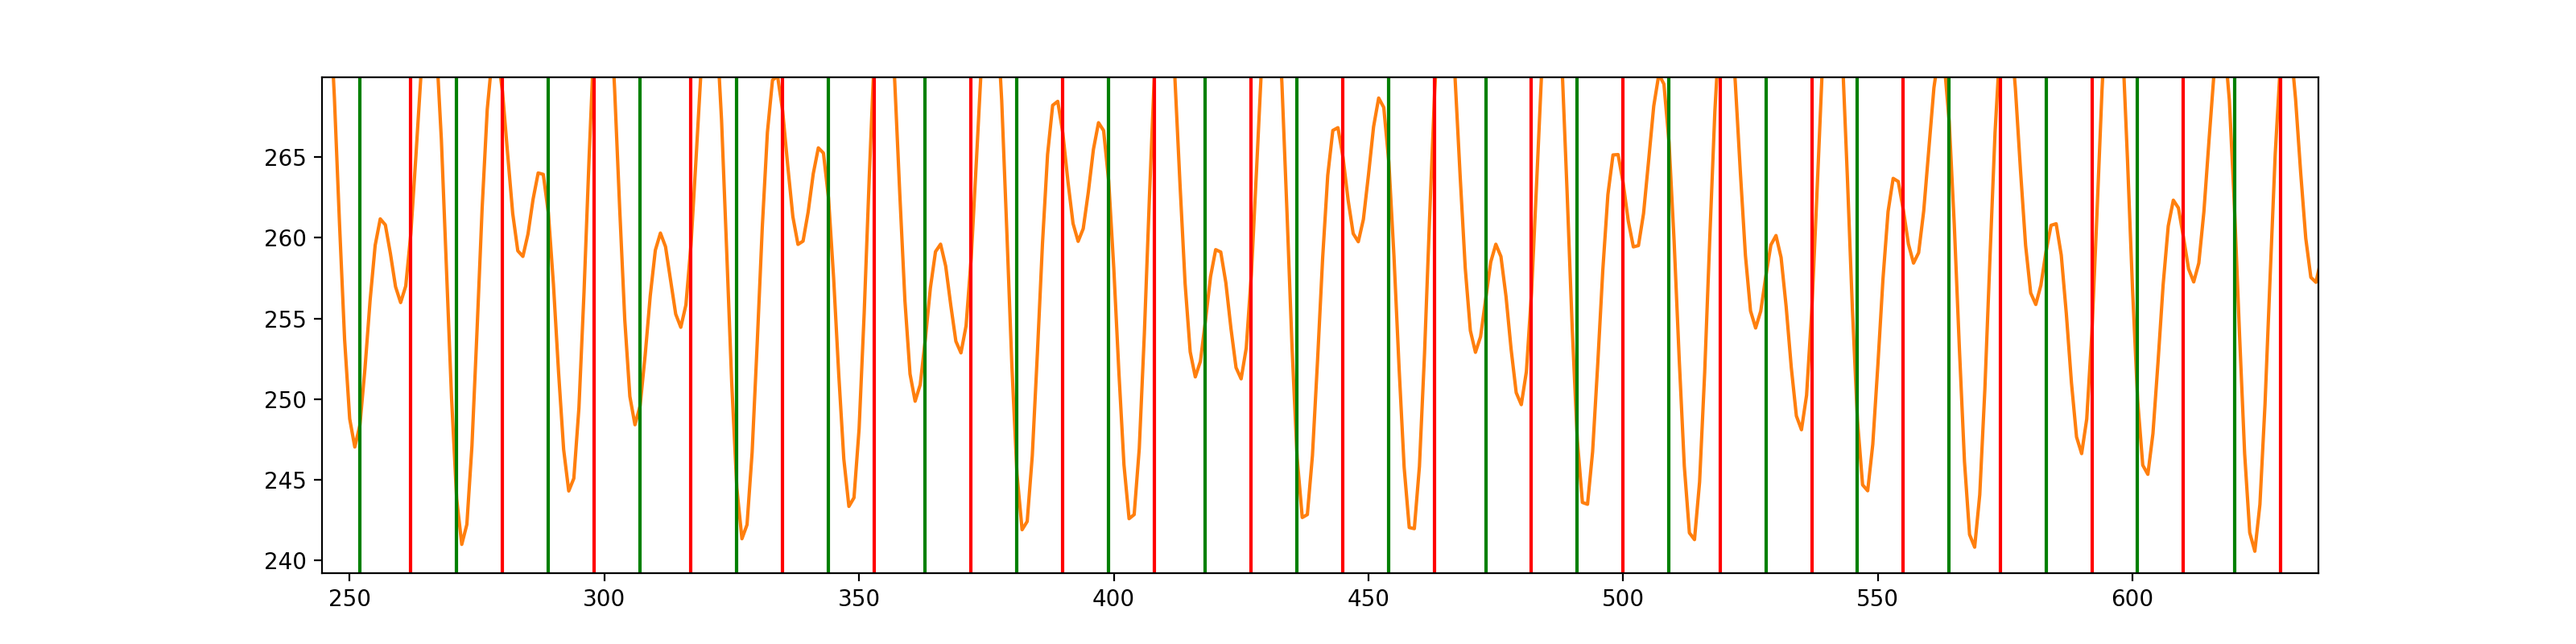

<IPython.core.display.Javascript object>


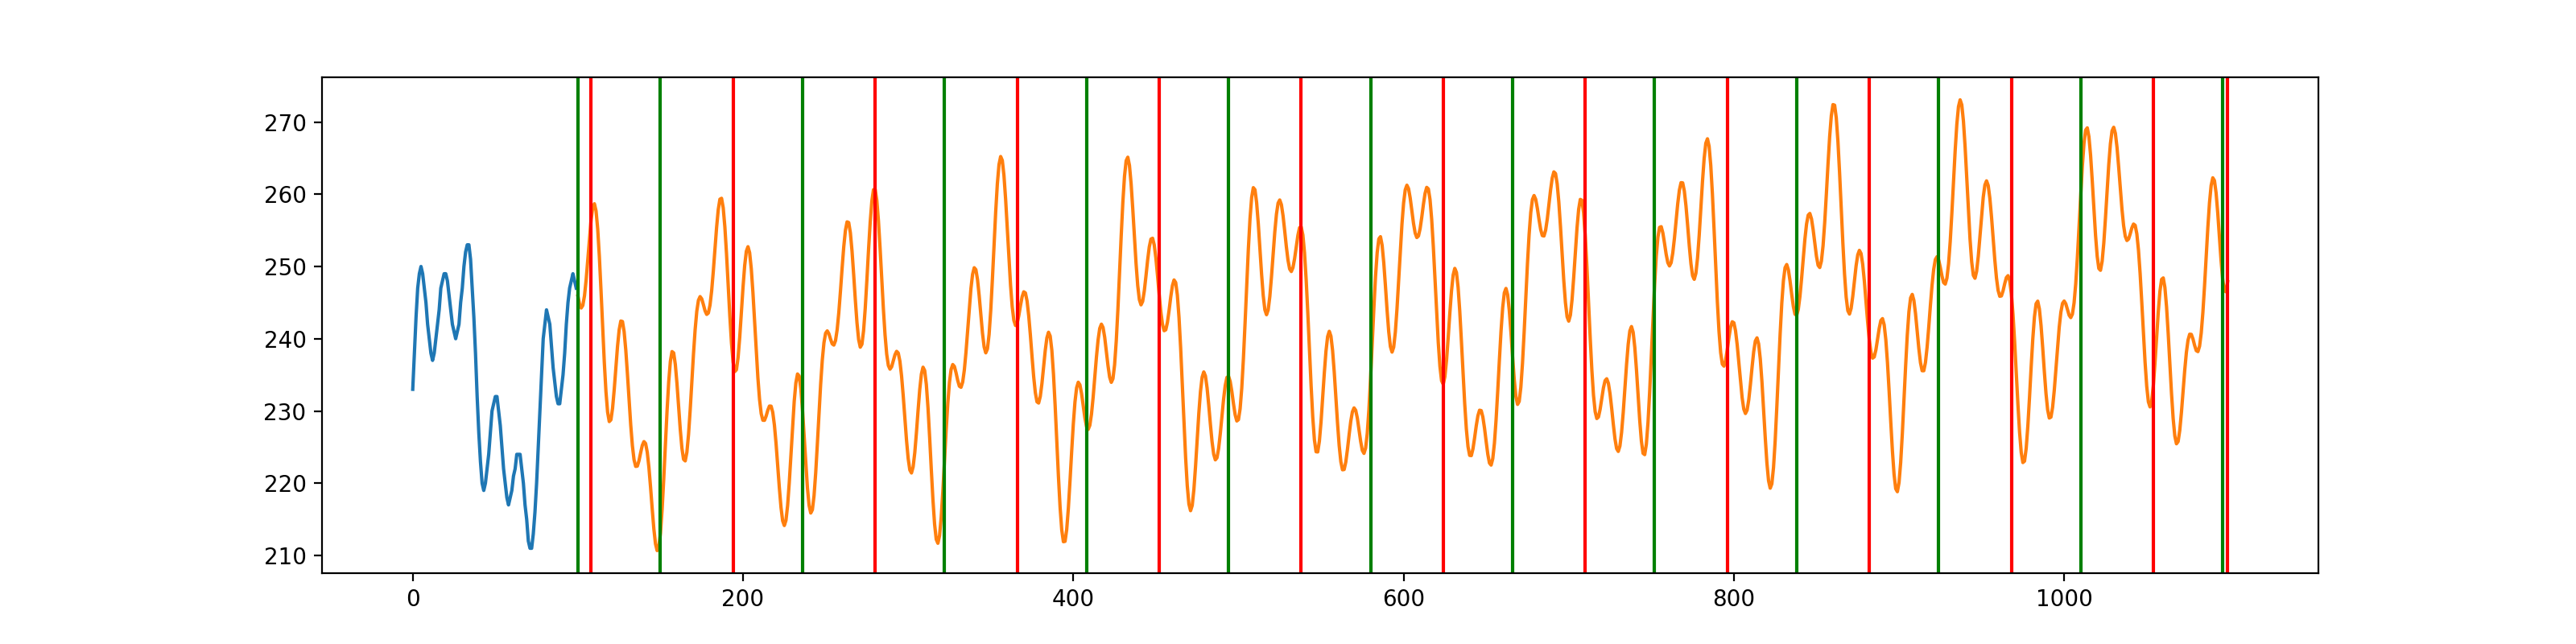

<IPython.core.display.Javascript object>


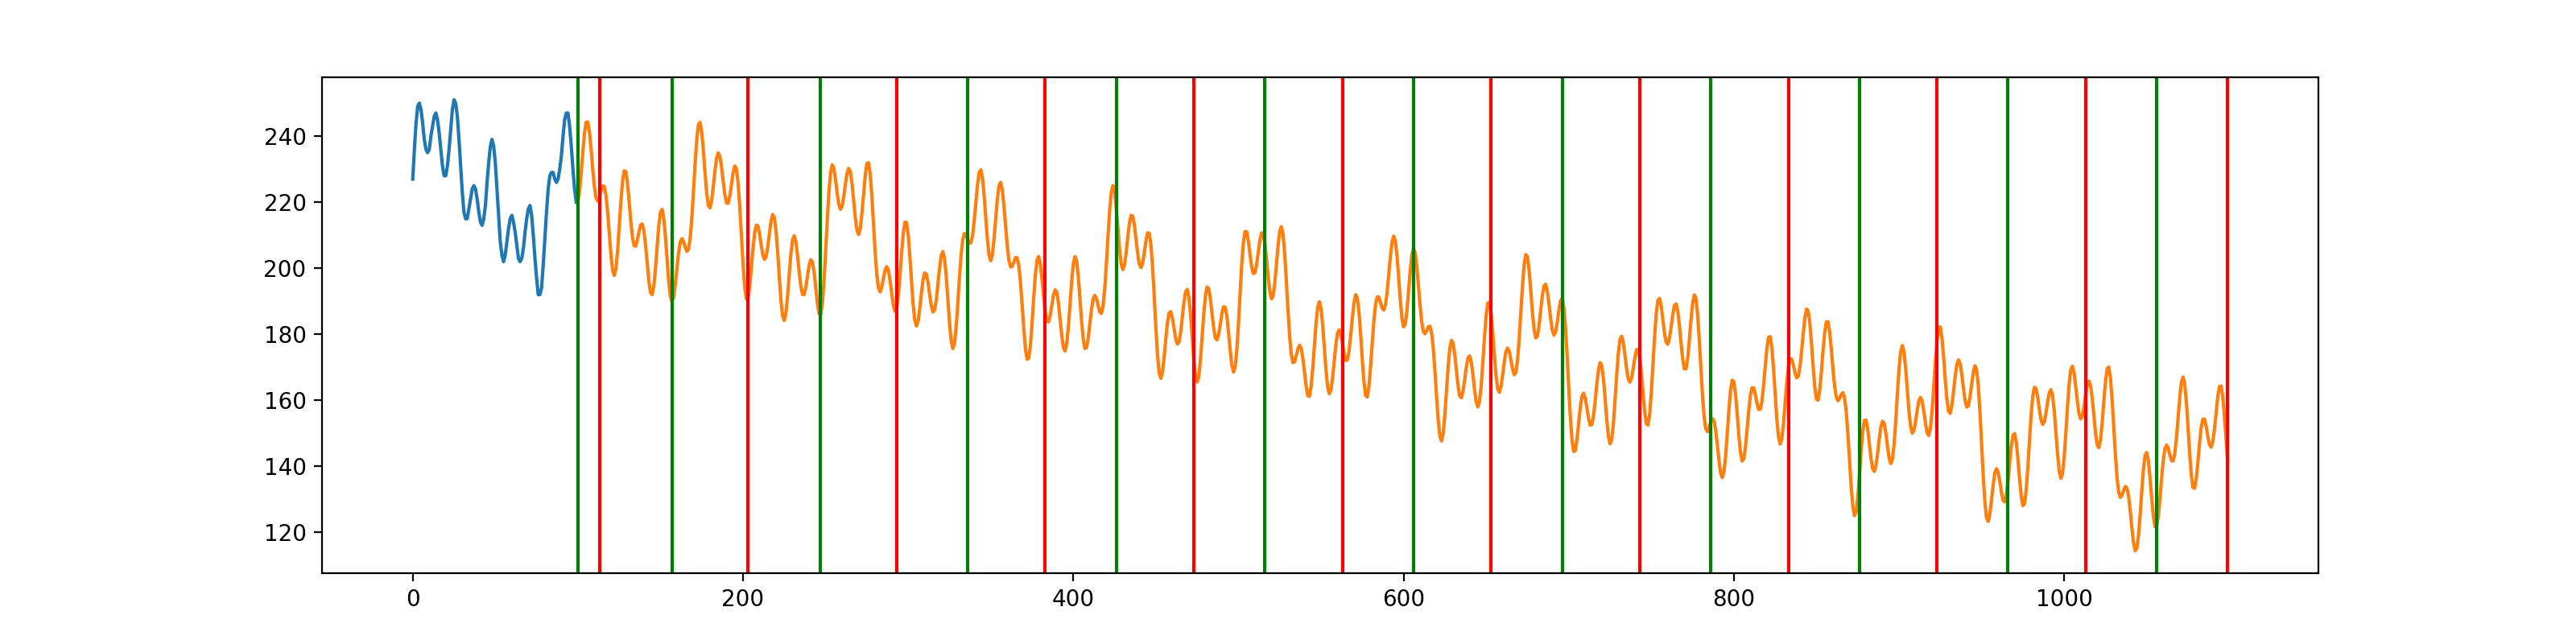

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from app.trade_optimizer import get_optimal_trades
from app import generation, evaluate, my_solver, trade_simulator


#  http://134.209.59.92/technical-analysis, response: [[100,113,122,131,140,150,159,168,177,186,195,204,213,222,231,240,249,258,267,276,285,295,304,313,322,331,340,349,358,367,376,385,394,403,412,421,430,440,449,458,467,476,485,494,503,512,521,530,539,548,557,566,575,585,594,603,612,621,630,639,648,657,666,675,684,693,702,711,720,730,739,748,757,766,775,784,793,802,811,820,829,838,847,856,865,875,884,893,902,911,920,929,938,947,956,965,974,983,992,1001,1010,1020,1029,1038,1047,1056,1065,1074,1083,1092],[100,115,124,133,142,151,161,170,179,188,197,206,216,225,234,243,252,262,271,280,289,298,307,317,326,335,344,353,363,372,381,390,399,408,418,427,436,445,454,463,473,482,491,500,509,519,528,537,546,555,564,574,583,592,601,610,620,629,638,647,656,665,675,684,693,702,711,720,730,739,748,757,766,776,785,794,803,812,821,831,840,849,858,867,877,886,895,904,913,922,932,941,950,959,968,977,987,996,1005,1014,1023,1032,1042,1051,1060,1069,1078,1088,1097,1099],[100,108,150,194,236,280,322,366,408,452,494,538,580,624,666,710,752,796,838,882,924,968,1010,1054,1096,1099],[100,113,157,203,247,293,336,383,426,473,516,563,606,653,696,743,786,833,876,923,966,1013,1056,1099]]
# 2019-09-29T03:17:31.366691+00:00 app[web.1]: INFO in evaluate: Evaluation result: {'runId': 'bd5e76d6-c0a1-4353-94db-0e3e6e172a38', 'score': 10, 'message': 'runId: bd5e76d6-c0a1-4353-94db-0e3e6e172a38, teamUrl: http://134.209.59.92. Seed is 93,316,338. Solver finished in 12.7s. Scenario 1 score is 0.94, amounts are 174.15 / 185.30. Scenario 2 score is 0.00, amounts are 1.59 / 1234.48. Scenario 3 score is 0.01, amounts are 1.50 / 85.57. Scenario 4 score is 0.00, amounts are 1.01 / 30603.34'}


responses = [[100,113,122,131,140,150,159,168,177,186,195,204,213,222,231,240,249,258,267,276,285,295,304,313,322,331,340,349,358,367,376,385,394,403,412,421,430,440,449,458,467,476,485,494,503,512,521,530,539,548,557,566,575,585,594,603,612,621,630,639,648,657,666,675,684,693,702,711,720,730,739,748,757,766,775,784,793,802,811,820,829,838,847,856,865,875,884,893,902,911,920,929,938,947,956,965,974,983,992,1001,1010,1020,1029,1038,1047,1056,1065,1074,1083,1092],[100,115,124,133,142,151,161,170,179,188,197,206,216,225,234,243,252,262,271,280,289,298,307,317,326,335,344,353,363,372,381,390,399,408,418,427,436,445,454,463,473,482,491,500,509,519,528,537,546,555,564,574,583,592,601,610,620,629,638,647,656,665,675,684,693,702,711,720,730,739,748,757,766,776,785,794,803,812,821,831,840,849,858,867,877,886,895,904,913,922,932,941,950,959,968,977,987,996,1005,1014,1023,1032,1042,1051,1060,1069,1078,1088,1097,1099],[100,108,150,194,236,280,322,366,408,452,494,538,580,624,666,710,752,796,838,882,924,968,1010,1054,1096,1099],[100,113,157,203,247,293,336,383,426,473,516,563,606,653,696,743,786,833,876,923,966,1013,1056,1099]]
seed = 93316338
for scenario, response in zip(generation.get_standard_scenarios(seed), responses):
    train = scenario.train_signal
    test = scenario.test_signal
    fig = plt.figure()
    fig.set_size_inches(16, 4)
    plt.plot(np.arange(train.shape[0]), train)
    plt.plot(train.shape[0] + np.arange(test.shape[0]), test)
    for i, t in enumerate(response):
        isSell = i % 2 == 1
        plt.axvline(t, color=['green', 'red'][isSell])
    plt.show()